<a href="https://colab.research.google.com/github/AbiramiSridharan/Time-series-ML--mini-project-on-stock-market-data/blob/main/Electronics_Project_FbProphet_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import express
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')





*   Loading Data into dataframe df
*   Changing Date column datatype to datetime



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/Electronics_final.csv')
df.head(10)
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.dtypes

Date            datetime64[ns]
Sales                  float64
Expenses               float64
Net profit             float64
Company Name            object
dtype: object

In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          50 non-null     datetime64[ns]
 1   Sales         50 non-null     float64       
 2   Expenses      50 non-null     float64       
 3   Net profit    50 non-null     float64       
 4   Company Name  50 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,Sales,Expenses,Net profit
count,50.000000,50.000000,50.000000
mean,78.551000,70.816200,3.655400
std,92.149723,82.935641,6.238879
min,0.540000,0.180000,-8.150000
25%,10.165000,10.102500,0.280000
50%,32.910000,27.560000,2.405000
75%,178.727500,163.302500,6.015000
max,272.740000,239.960000,26.510000


In [ ]:
df['Company Name'].unique()

array(['Aditya Vision', 'Centum Electron', 'Shivalik Bimetal',
       'Kernex Microsys', 'Nitiraj Engineer', 'Aplab', 'Pulz Electronics'],
      dtype=object)

In [ ]:
df.columns

Index(['Date', 'Sales', 'Expenses', 'Net profit', 'Company Name'], dtype='object')

Null Values Checking

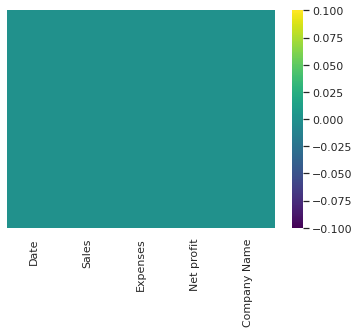

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [ ]:
df.isnull().sum()

Date            0
Sales           0
Expenses        0
Net profit      0
Company Name    0
dtype: int64

In [ ]:
df.head(5)

,Date,Sales,Expenses,Net profit,Company Name
0,2019-12-31,199.83,189.18,6.06,Aditya Vision
1,2020-03-31,145.96,138.71,1.65,Aditya Vision
2,2020-09-30,136.67,137.05,2.69,Aditya Vision
3,2020-12-31,247.04,238.91,8.48,Aditya Vision
4,2021-03-31,212.76,173.88,17.21,Aditya Vision


Heat map

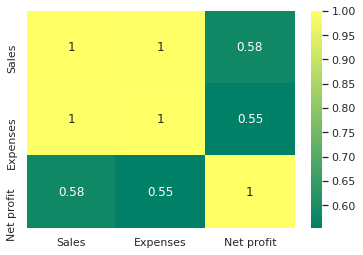

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='summer')

Pair plot

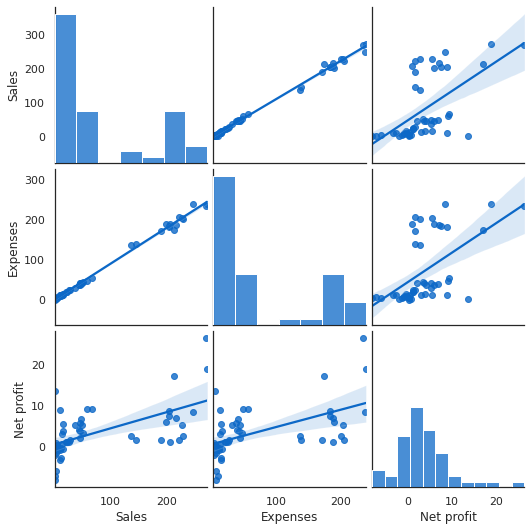

In [ ]:
sns.pairplot(df, kind='reg')

Bar plot shows the sum of Sales, Expenses,NetProfit of each Company

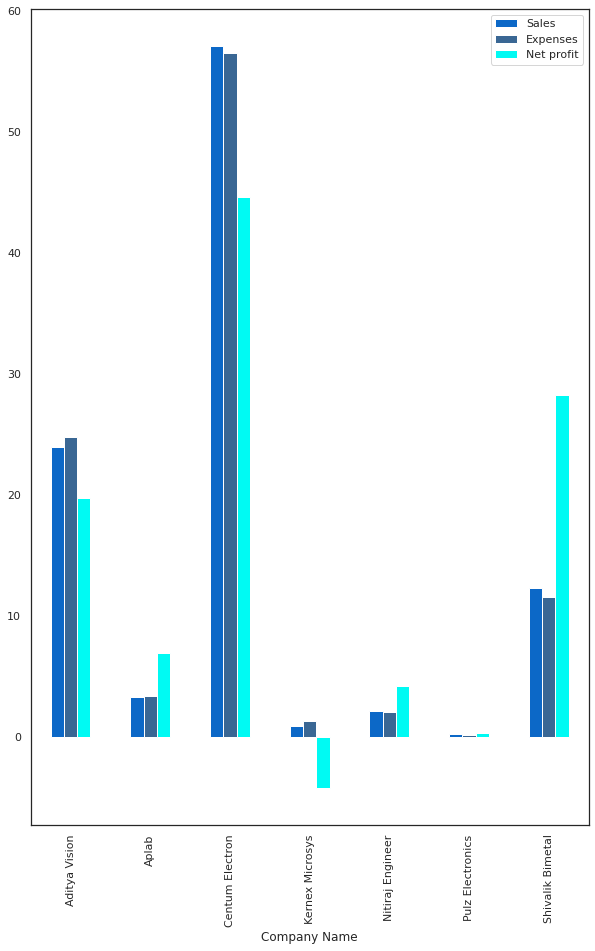

In [ ]:
df1=df[['Sales','Expenses','Net profit','Company Name']].groupby(['Company Name']).sum().transform(lambda x: x/np.sum(x)*100)
df1.plot(kind='bar',figsize=(10,15))

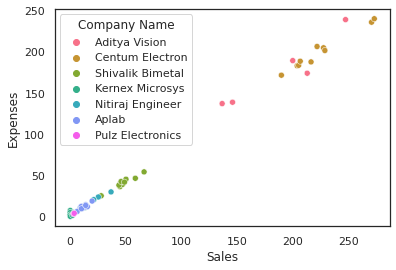

In [ ]:
sns.scatterplot(x='Sales', y='Expenses', hue='Company Name', data=df) 
plt.show()

In [ ]:
fig1=express.box(df,x='Company Name' ,y="Sales")
fig1.show()
fig2=express.box(df,x='Company Name' ,y="Expenses")
fig2.show()
fig3=express.box(df,x='Company Name' ,y="Net profit")
fig3.show()

In [ ]:
ElectronicsDomain_Sales=df.groupby('Date', as_index=False)['Date','Sales'].sum().rename({'Date':'ds','Sales':'y'},axis='columns')
ElectronicsDomain_Expenses=df.groupby('Date',as_index=False)['Date','Expenses'].sum().rename({'Date':'ds','Expenses':'y'},axis='columns')
ElectronicsDomain_NetProfit=df.groupby('Date',as_index=False)['Date','Net profit'].sum().rename({'Date':'ds','Net profit':'y'},axis='columns')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**Sales Prediction**

In [ ]:
from fbprophet import Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


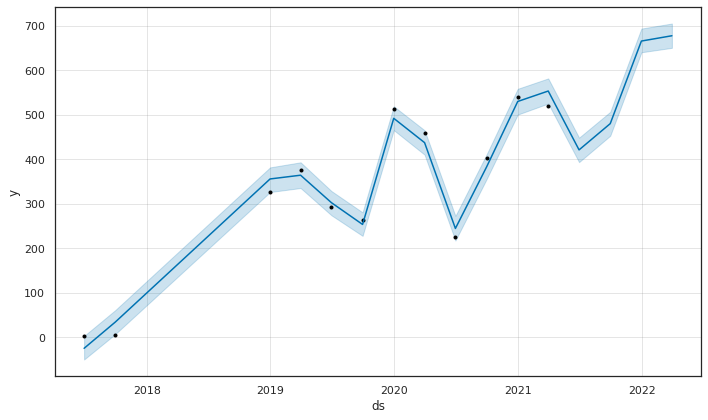

In [ ]:
target_sales=pd.DataFrame()
model_sales=Prophet(interval_width=0.80)
model_sales.fit(ElectronicsDomain_Sales)
future_sales=model_sales.make_future_dataframe(periods=4,freq='Q')
forecast_sales=model_sales.predict(future_sales)
model_sales.plot(forecast_sales)
target_sales=pd.merge(target_sales,forecast_sales.set_index('ds'),how='outer',left_index=True,right_index=True)

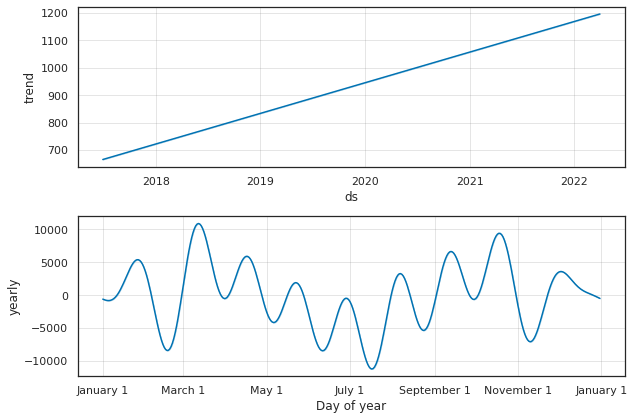

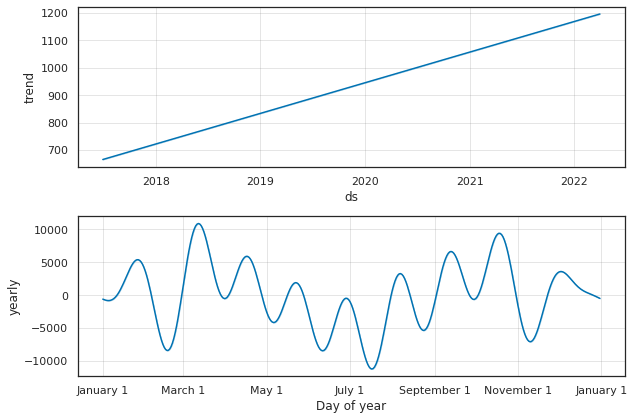

In [ ]:
model_sales.plot_components(forecast_sales)

**Net Profit Prediction**

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


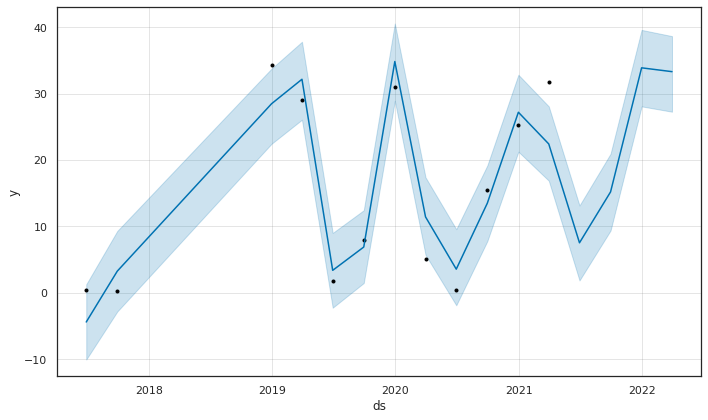

In [ ]:
target_netprofit=pd.DataFrame()
model_netprofit=Prophet(interval_width=0.80)
model_netprofit.fit(ElectronicsDomain_NetProfit)
future_netprofit=model_netprofit.make_future_dataframe(periods=4,freq='Q')
forecast_netprofit=model_netprofit.predict(future_netprofit)
model_netprofit.plot(forecast_netprofit)
target_netprofit=pd.merge(target_netprofit,forecast_netprofit.set_index('ds'),how='outer',left_index=True,right_index=True)

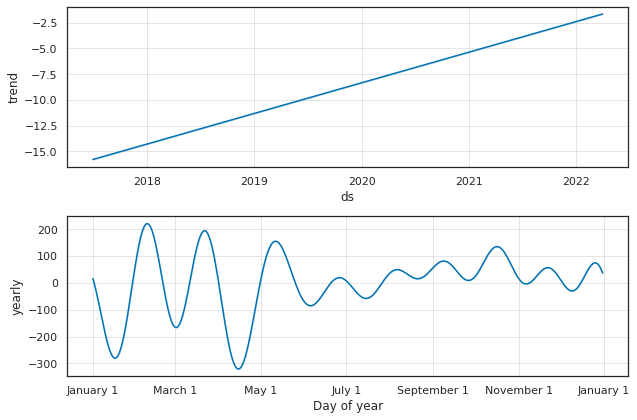

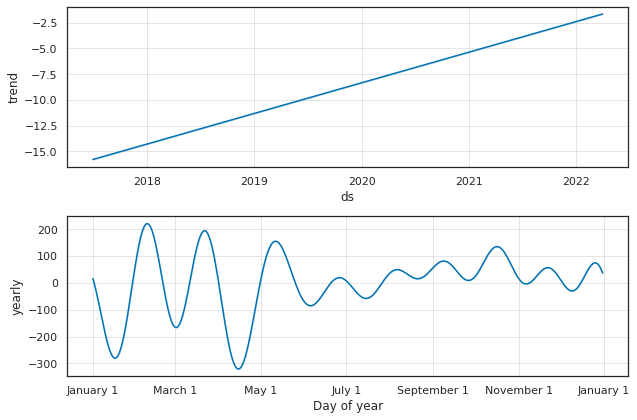

In [ ]:
model_netprofit.plot_components(forecast_netprofit)

**Cross validation For Sales**

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_sales, initial='20 days', period='50 days', horizon = '100 days')
df_cv.head()

INFO:fbprophet:Making 17 forecasts with cutoffs between 2018-10-13 00:00:00 and 2020-12-21 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbproph

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-12-31,70.094567,70.094567,70.094567,326.37,2018-10-13
1,2018-12-31,70.094567,70.094567,70.094568,326.37,2018-12-02
2,2019-03-31,-3297.423811,-3297.423811,-3297.423810,375.52,2019-01-21
3,2019-03-31,-3297.423811,-3297.423811,-3297.423810,375.52,2019-03-12
4,2019-06-30,-148.200998,-148.200999,-148.200997,293.32,2019-05-01


Performance Metrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,2.423671e+05,492.307923,492.307923,1.866712,1.866712,0.0
1,10 days,1.100227e+05,331.696758,299.982792,0.899373,0.899373,0.0
2,18 days,3.184811e+04,178.460398,178.460398,0.442940,0.442940,0.0
3,19 days,1.349052e+07,3672.943811,3672.943811,9.780954,9.780954,0.0
4,26 days,8.857723e+03,94.115479,94.115479,0.416938,0.416938,0.0


In [ ]:
#from fbprophet.plot import plot_cross_validation_metric
#fig = plot_cross_validation_metric(df_cv, metric='rmse')

# **CompanyWise Prediction **

In [ ]:
from fbprophet import Prophet

In [ ]:
df1=df[['Date','Sales','Expenses','Net profit','Company Name']].rename({'Date':'ds','Sales':'y'},axis='columns')

In [ ]:
df1.head(5)

,ds,y,Expenses,Net profit,Company Name
0,2019-12-31,199.83,189.18,6.06,Aditya Vision
1,2020-03-31,145.96,138.71,1.65,Aditya Vision
2,2020-09-30,136.67,137.05,2.69,Aditya Vision
3,2020-12-31,247.04,238.91,8.48,Aditya Vision
4,2021-03-31,212.76,173.88,17.21,Aditya Vision


In [ ]:
companies=df1.groupby('Company Name')
companies.head()

,ds,y,Expenses,Net profit,Company Name
0,2019-12-31,199.83,189.18,6.06,Aditya Vision
1,2020-03-31,145.96,138.71,1.65,Aditya Vision
2,2020-09-30,136.67,137.05,2.69,Aditya Vision
3,2020-12-31,247.04,238.91,8.48,Aditya Vision
4,2021-03-31,212.76,173.88,17.21,Aditya Vision
5,2018-12-31,270.29,235.79,26.51,Centum Electron
6,2019-03-31,272.74,239.96,19.00,Centum Electron
7,2019-06-30,221.55,206.29,1.71,Centum Electron
8,2019-09-30,203.75,183.01,8.83,Centum Electron
9,2019-12-31,227.35,204.72,5.41,Centum Electron


In [ ]:
target=pd.DataFrame()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling weekly seasonality. Run p

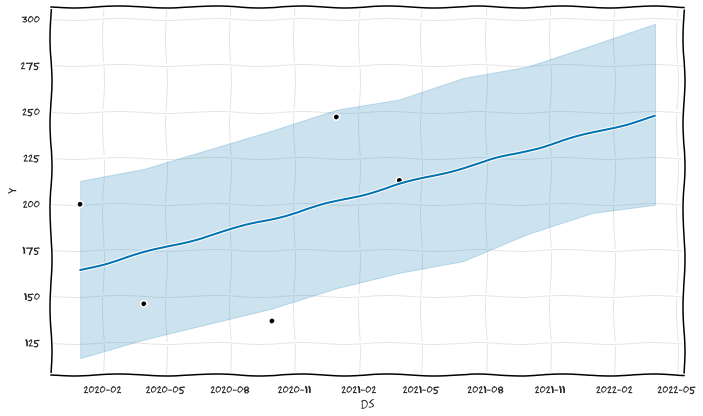

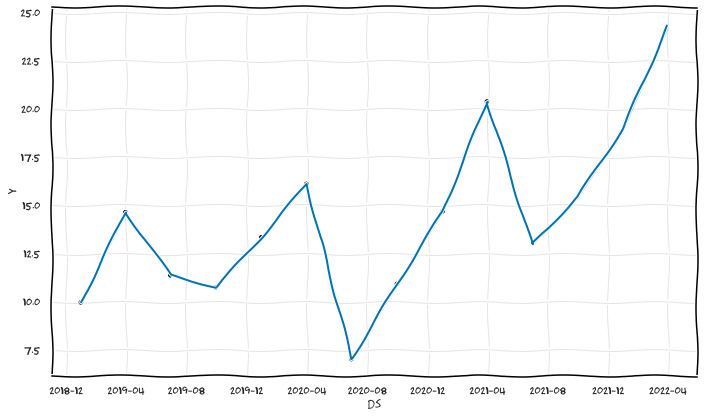

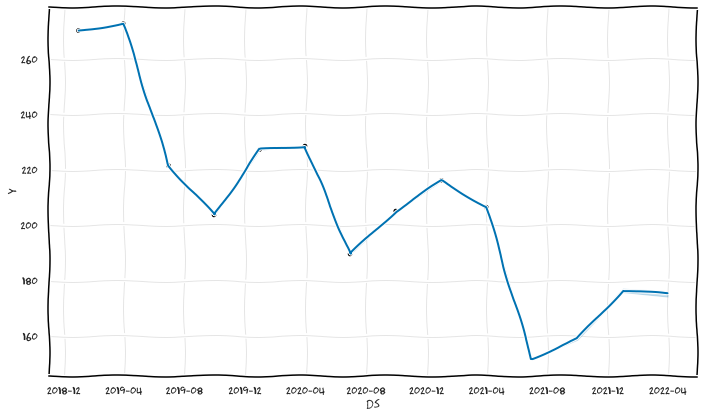

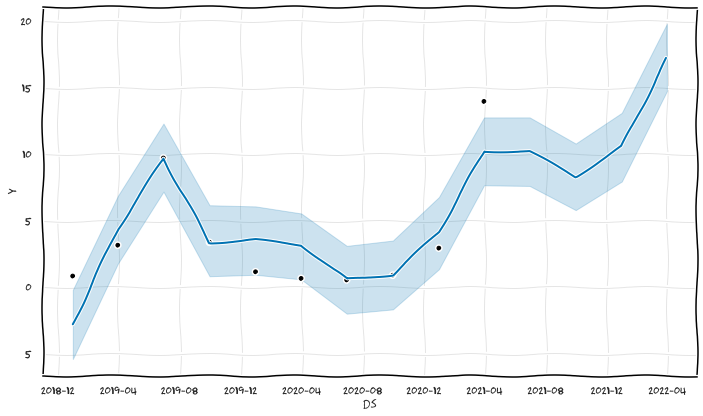

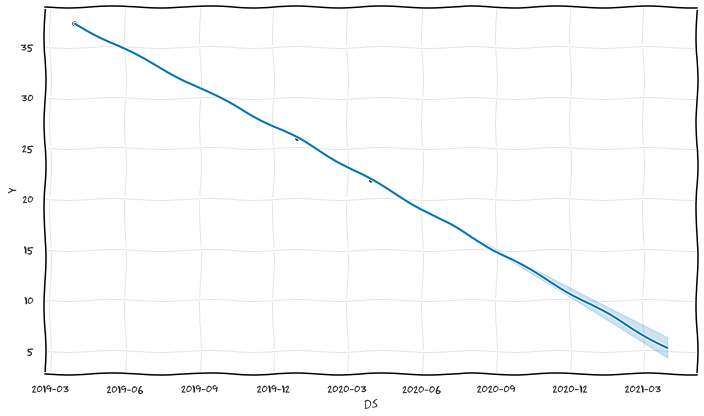

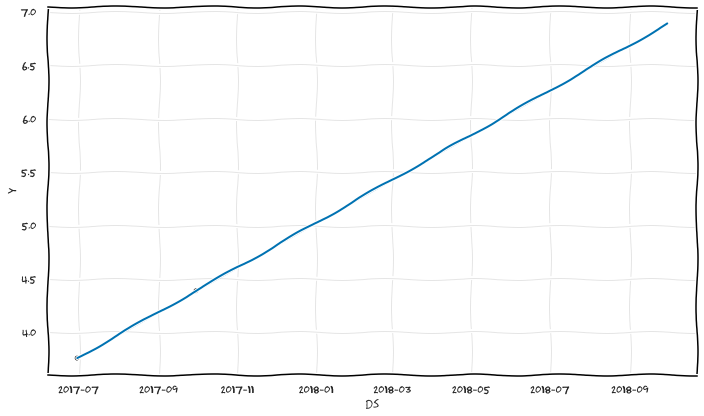

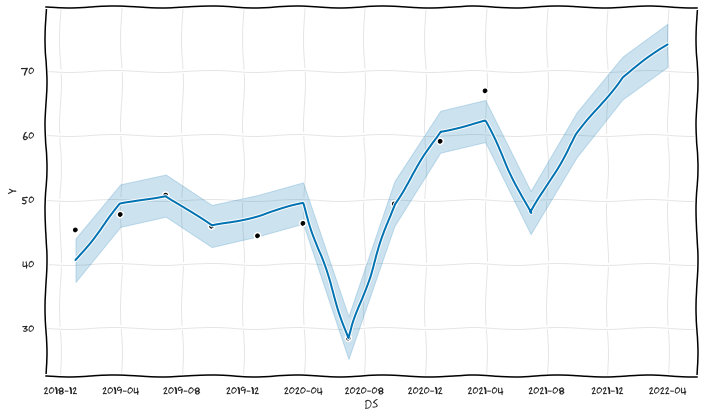

In [ ]:
with plt.xkcd():  
  for company in companies.groups:
    group=companies.get_group(company)
    m=Prophet(interval_width=0.80)
    m.fit(group)
    future=m.make_future_dataframe(periods=4,freq='Q')
    forecast=m.predict(future)
    m.plot(forecast)
    forecast=forecast.rename(columns={'yhat':'yhat_'+company})
    target=pd.merge(target,forecast.set_index('ds'),how='outer',left_index=True,right_index=True)